# Module 2.6 — Outcome Dispersion Across Time, Not Just Across Traders
# Pre-Simulation belief
1. Performance reflects current system quality
    - If results improve, something must be working better.
    - If results deteriorate, something must have broken or changed.
2. Recent outcomes are more informative than distant ones
    - The latest segment best reflects the “current” effectiveness of the system.
    - Older performance is less relevant to present decision-making.
3. Equity curve shape carries causal meaning
    - Smooth periods imply robustness.
    - Choppy or declining periods imply instability or degradation.
4. Intervention is justified by temporal underperformance
    - Prolonged underperformance signals the need for adjustment.
    - Doing nothing during bad periods feels irresponsible.
5. If the system were truly sound, its behavior would be more consistent
    - Large swings across time feel like evidence of regime change rather than variance.

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.lib.stride_tricks import sliding_window_view

p = 0.55
n_trades = 10000
block_len = 500


In [6]:
seq = np.where(
    np.random.rand(n_trades) < p,
    1,
    -1
)
path = np.cumsum(seq)

blocks = sliding_window_view(path, block_len)[::block_len]
block_rebased = blocks - blocks[:, [0]]
block_pnl = block_rebased[:, -1]



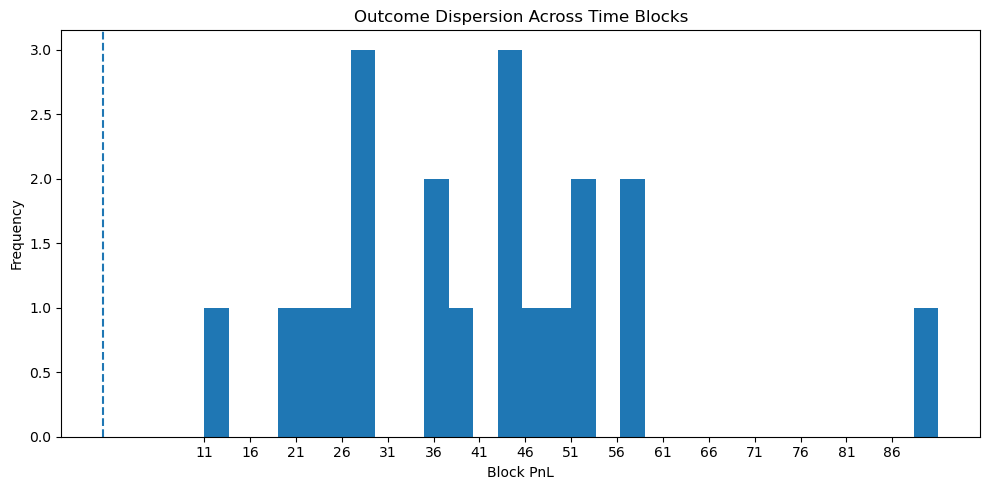

In [7]:
plt.figure(figsize=(10, 5))
plt.hist(block_pnl, bins=30)
plt.axvline(0, linestyle='--')
plt.title('Outcome Dispersion Across Time Blocks')
plt.xlabel('Block PnL')
plt.xticks(np.arange(block_pnl.min(), block_pnl.max())[::5])
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


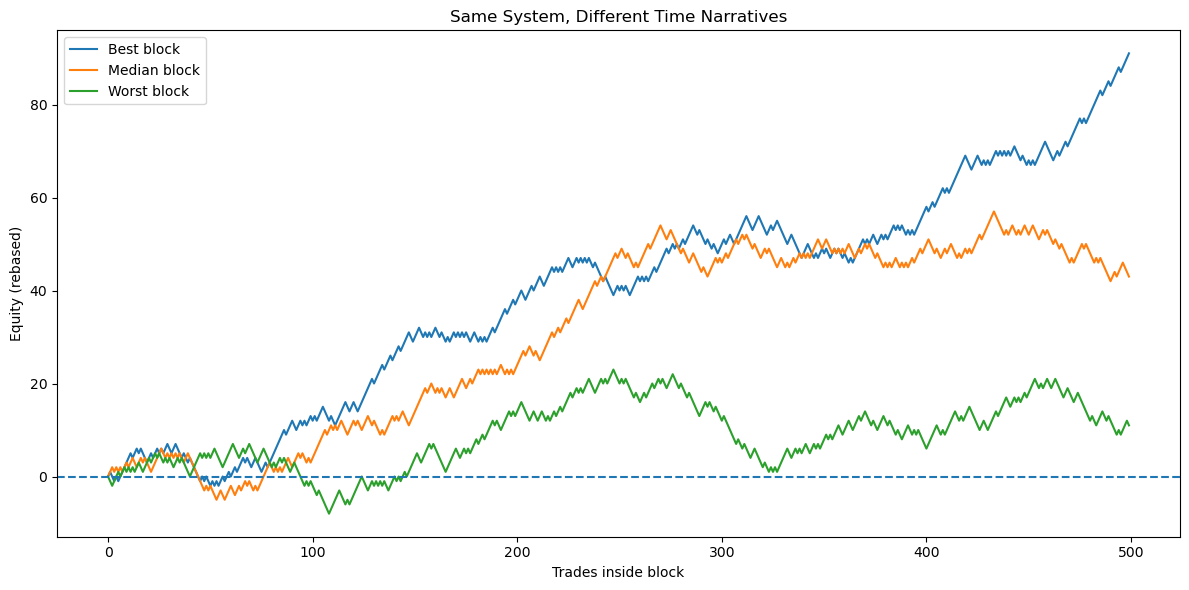

In [8]:
best = np.argmax(block_pnl)
worst = np.argmin(block_pnl)
median = np.argsort(block_pnl)[len(block_pnl)//2]

plt.figure(figsize=(12, 6))
plt.plot(block_rebased[best], label="Best block")
plt.plot(block_rebased[median], label="Median block")
plt.plot(block_rebased[worst], label="Worst block")

plt.axhline(0, linestyle='--')
plt.title('Same System, Different Time Narratives')
plt.xlabel('Trades inside block')
plt.ylabel('Equity (rebased)')
plt.legend()
plt.tight_layout()
plt.show()


# Observation
### This simulation shows that outcome dispersion occurs not only across different agents, but also across different periods of time within the same system. When a single positive-expectancy process is segmented into consecutive time blocks, individual blocks can appear highly profitable, marginal, or significantly losing despite identical underlying rules and probabilities. These variations arise purely from temporal variance, not from any change in system quality. As a result, short or intermediate time slices can produce misleading narratives about performance, making the same system look alternately “working” or “broken” depending on where observation begins and ends.